In [1]:
from keras.datasets import mnist
from keras.layers import *
from keras.models import Sequential,Model
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import Adam

import numpy as np
import matplotlib.pyplot as plt
import math


Using TensorFlow backend.


In [2]:
(X_train,_),(_,_)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape

X_train=X_train.reshape((*X_train.shape,1))
print(X_train.shape)

(60000, 28, 28, 1)


In [0]:
# plt.imshow(X_train[0],cmap='gray')
# plt.show()

In [0]:
#Normalize the data in range(-1,1)]
X_train= (X_train.astype('float32')-127.5)/127.5


In [6]:
print(np.min(X_train))
print(np.max(X_train))

-1.0
1.0


In [0]:
total_epochs=50
batch_size=256
no_of_batches=math.ceil(X_train.shape[0]/float(batch_size))
half_batch=int(batch_size/2)
noise_dim = 100 #upsample to 784dim vector
adam=Adam(lr=2e-4,beta_1=0.5)


In [8]:
#generator
generator = Sequential()
generator.add(Dense(7*7*128,input_shape=(noise_dim,)))
generator.add(Reshape((7,7,128)))
generator.add(LeakyReLU(0.2))
generator.add(BatchNormalization())
#We will double the activation_size=14*14*64 using upsampling 
# generator.add(UpSampling2D())
# generator.add(Conv2D(64,kernel_size=(5,5),padding='same'))
generator.add(Conv2DTranspose(64,kernel_size=(5,5),padding='same',strides=(2,2)))
generator.add(LeakyReLU(0.2))
generator.add(BatchNormalization())
#We will double the activation_size=28*28*1 using upsampling 
# generator.add(UpSampling2D())
# generator.add(Conv2D(1,kernel_size=(5,5),padding='same',activation='tanh'))
generator.add(Conv2DTranspose(1,kernel_size=(5,5),padding='same',strides=(2,2),activation='tanh'))
generator.compile(loss='binary_crossentropy',optimizer=adam)
generator.summary()














Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6272)              633472    
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 128)         0         
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 7, 7, 128)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 7, 7, 128)         512       
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 14, 14, 64)        204864    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 14, 14, 64)        0         
_____________

In [9]:
#Dicriminator
discriminator = Sequential()
discriminator.add(Conv2D(64,(5,5),strides=(2,2),padding='same',input_shape=(28,28,1)))#Stridded pooling works best in case of GANs
discriminator.add(LeakyReLU(0.2))
        
#Next Conv layer for size(14*14*64)-->(7*7*128)#after this layer
discriminator.add(Conv2D(128,(5,5),strides=(2,2),padding='same'))
discriminator.add(LeakyReLU(0.2)) 

discriminator.add(Flatten())
discriminator.add(Dense(1,activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy',optimizer=adam)

discriminator.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 14, 14, 64)        1664      
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         204928    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 7, 7, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6273      
Total params: 212,865
Trainable params: 212,865
Non-trainable params: 0
________________________________________________

In [0]:
#GAN(step-2)
discriminator.trainable=False
gan_input=Input(shape=(noise_dim,))
generated_img=generator(gan_input)
gan_output=discriminator(generated_img)

#functional API
model =Model(gan_input,gan_output)
model.compile(loss='binary_crossentropy',optimizer=adam)


In [11]:
# X_train=X_train.reshape(-1,784)
print(X_train.shape)

(60000, 28, 28, 1)


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Epoch 1 Discriminator Loss 0.6688 Generator Loss 0.9856
Epoch 2 Discriminator Loss 0.7020 Generator Loss 0.8506
Epoch 3 Discriminator Loss 0.6894 Generator Loss 0.8444
Epoch 4 Discriminator Loss 0.6862 Generator Loss 0.8426
Epoch 5 Discriminator Loss 0.6893 Generator Loss 0.8335


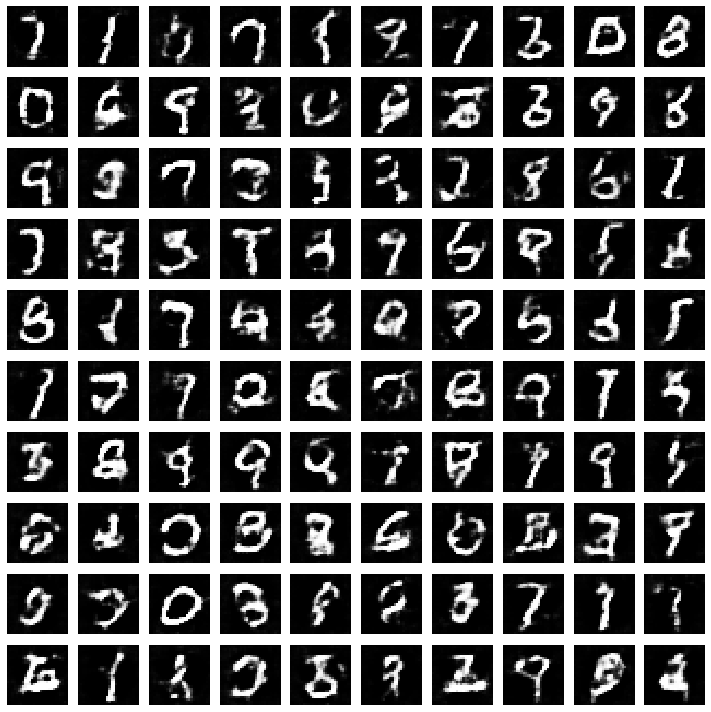

Epoch 6 Discriminator Loss 0.6903 Generator Loss 0.8263
Epoch 7 Discriminator Loss 0.6899 Generator Loss 0.8225
Epoch 8 Discriminator Loss 0.6896 Generator Loss 0.8203
Epoch 9 Discriminator Loss 0.6892 Generator Loss 0.8201
Epoch 10 Discriminator Loss 0.6885 Generator Loss 0.8218


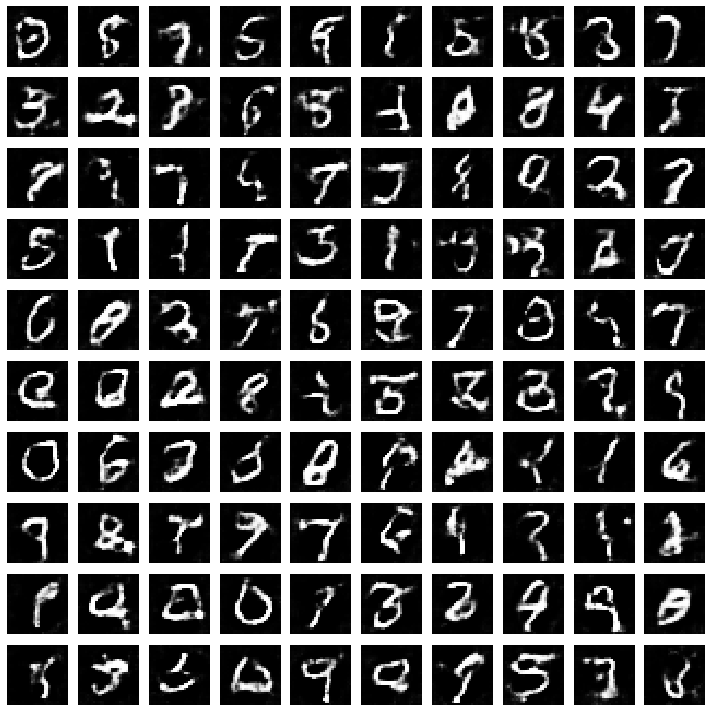

Epoch 11 Discriminator Loss 0.6879 Generator Loss 0.8233
Epoch 12 Discriminator Loss 0.6877 Generator Loss 0.8176
Epoch 13 Discriminator Loss 0.6875 Generator Loss 0.8208
Epoch 14 Discriminator Loss 0.6859 Generator Loss 0.8324
Epoch 15 Discriminator Loss 0.6861 Generator Loss 0.8213


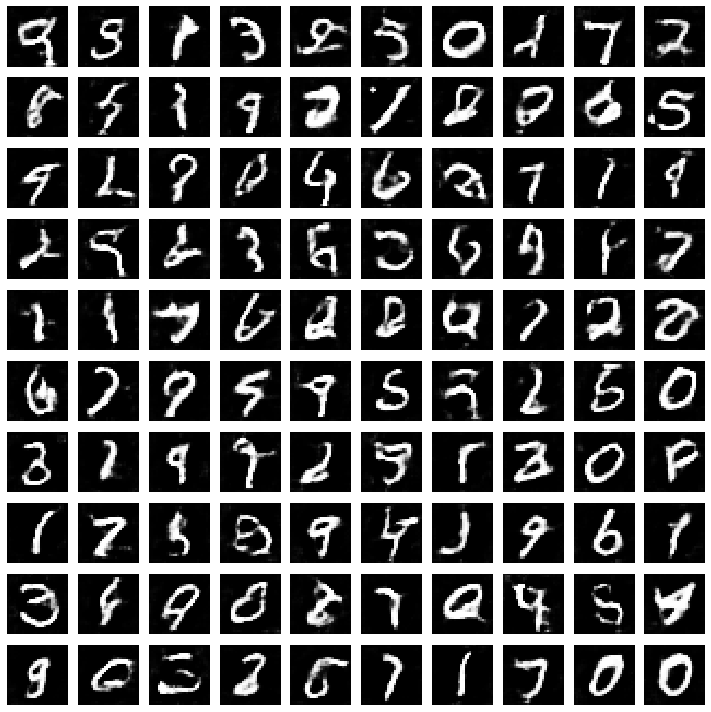

Epoch 16 Discriminator Loss 0.6860 Generator Loss 0.8204
Epoch 17 Discriminator Loss 0.6857 Generator Loss 0.8226
Epoch 18 Discriminator Loss 0.6850 Generator Loss 0.8350
Epoch 19 Discriminator Loss 0.6847 Generator Loss 0.8263
Epoch 20 Discriminator Loss 0.6848 Generator Loss 0.8256


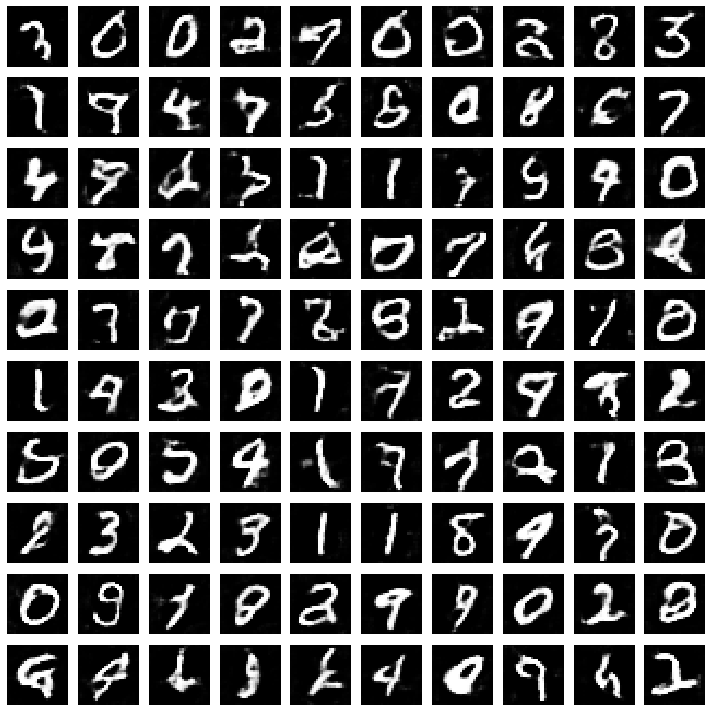

Epoch 21 Discriminator Loss 0.6842 Generator Loss 0.8282
Epoch 22 Discriminator Loss 0.6841 Generator Loss 0.8304
Epoch 23 Discriminator Loss 0.6836 Generator Loss 0.8314
Epoch 24 Discriminator Loss 0.6831 Generator Loss 0.8356
Epoch 25 Discriminator Loss 0.6808 Generator Loss 0.8616


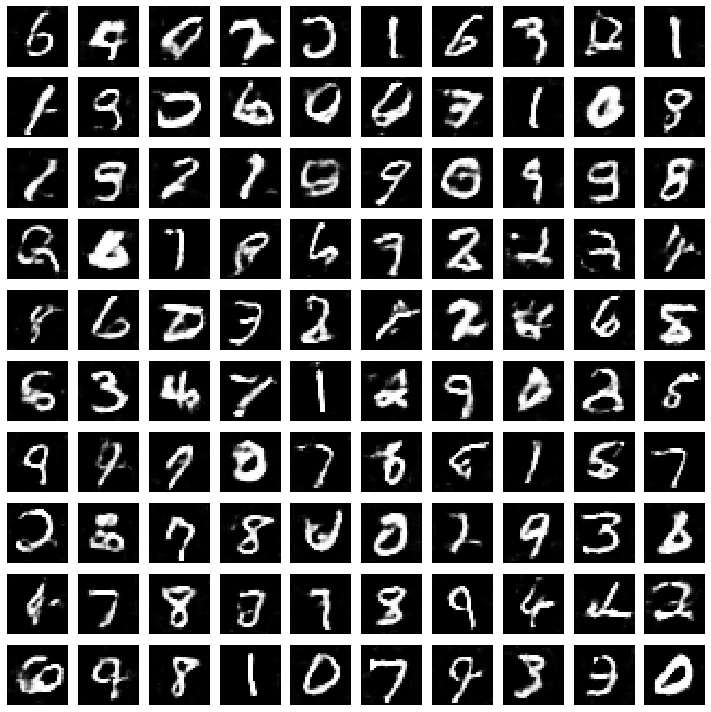

Epoch 26 Discriminator Loss 0.6818 Generator Loss 0.8354


KeyboardInterrupt: ignored

In [16]:
#Training loop
d_losses=[]
g_losses=[]
for epoch in range(total_epochs):
  epoch_d_loss=0.
  epoch_g_loss=0.
  #Mini Batch SGD
  for step in range(no_of_batches):
    #Step-1 :Discriminator
    #50%real data+ 50%fake data

    #REal Data
    idx=np.random.randint(0,X_train.shape[0],half_batch)
    real_imgs=X_train[idx]
    #FAke Data
    noise=np.random.normal(0,1,size=(half_batch,noise_dim))
    fake_imgs=generator.predict(noise) #forward

    #labels
    real_y=np.ones((half_batch,1))*0.9 #one sided label smoothening for discriminator
    fake_y=np.zeros((half_batch,1))
    #Train our Discriminator
    d_loss_real=discriminator.train_on_batch(real_imgs,real_y)
    d_loss_fake=discriminator.train_on_batch(fake_imgs,fake_y)
    d_loss=0.5*d_loss_real+0.5*d_loss_fake

    epoch_d_loss+=d_loss


    #Train Generator (Considering frozen Discriminator)

    noise =np.random.normal(0,1,size=(batch_size,noise_dim))
    ground_truth_y=np.ones((batch_size,1))
    g_loss= model.train_on_batch(noise,ground_truth_y)
    epoch_g_loss+=g_loss
  print("Epoch %d Discriminator Loss %.4f Generator Loss %.4f"%((epoch+1),epoch_d_loss/no_of_batches,epoch_g_loss/no_of_batches))
  d_losses.append(epoch_d_loss/no_of_batches)
  g_losses.append(epoch_g_loss/no_of_batches)
  if (epoch+1)%5==0:
    generator.save('model/gan_generator_{0}.h5'.format(epoch+1))
    save_images(epoch)



In [0]:
!mkdir model

In [14]:
!ls

images	model  sample_data


In [0]:
def save_images(epoch,samples=100):
  noise=np.random.normal(0,1,size=(samples,noise_dim))
  generated_imgs=generator.predict(noise)
  generated_imgs=generated_imgs.reshape(samples,28,28)

  plt.figure(figsize=(10,10))
  for i in range(samples):
    plt.subplot(10,10,i+1)
    plt.imshow(generated_imgs[i],interpolation='nearest',cmap='gray')
    plt.axis('off')

  plt.tight_layout()
  plt.savefig('images/gan_output_epoch_{}.png'.format(epoch+1))
  plt.show()

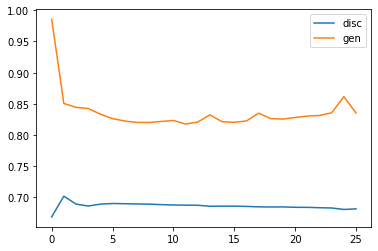

In [17]:
plt.plot(d_losses,label='disc')
plt.plot(g_losses,label='gen')
plt.legend()
plt.show()